In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import collections as defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [9]:
df = pd.read_csv("fina.csv")
df

,Fare,distance,passenger_count,year,Month,Date,Hour,Minute,Second
0,4.5,1.030765,1.0,2009,6,15,17,26,21
1,16.9,8.450145,1.0,2010,1,5,16,52,16
2,5.7,1.389527,2.0,2011,8,18,0,35,0
3,7.7,2.799274,1.0,2012,4,21,4,30,42
4,5.3,1.999160,1.0,2010,3,9,7,51,0
...,...,...,...,...,...,...,...,...,...
15580,6.5,0.850046,1.0,2014,12,12,7,41,0
15581,16.1,7.867649,2.0,2009,7,13,7,58,0
15582,8.5,1.469108,1.0,2009,11,11,11,19,7
15583,8.1,2.590040,1.0,2010,5,11,23,53,0


In [81]:
test   = pd.read_csv("test.csv")

Fare


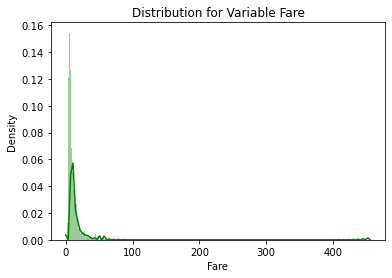

distance


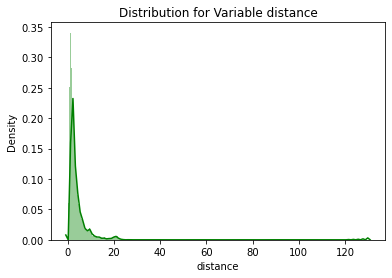

In [13]:
#Normality check of training data is uniformly distributed or not-

for i in ['Fare', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Since we saw above that fare amount is highly skewed,let us take log transformation of the fare amount and plot the distribution

In [14]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
df['Fare'] = np.log1p(df['Fare'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
df['distance'] = np.log1p(df['distance'])

Fare


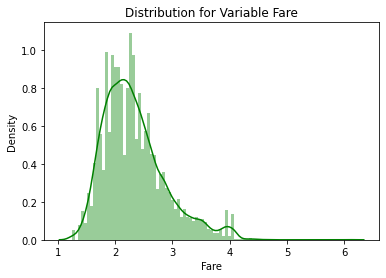

distance


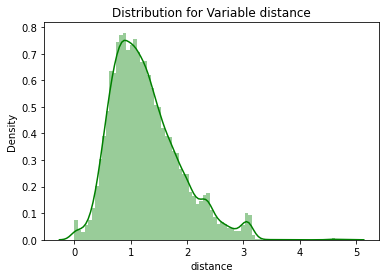

In [17]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['Fare', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any Feature Scalling technique. i.e, Normalization or Standarization for our training data

In [27]:
df = df.drop(['passenger_count', 'year', 'Date', 'Minute', 'Second'], axis = 1) 
df

,Fare,distance,Month,Hour
0,1.704748,0.708413,6,17
1,2.884801,2.246030,1,16
2,1.902108,0.871095,8,0
3,2.163323,1.334810,4,4
4,1.840550,1.098332,3,7
...,...,...,...,...
15580,2.014903,0.615210,12,7
15581,2.839078,2.182410,7,7
15582,2.251292,0.903857,11,11
15583,2.208274,1.278163,5,23


We drop 'year' because it has high collinearity among other variables which wont add any much substantial detail while building model. Concluded by Chi-Square Test.

We see very less deviation of spread of Fare variable when doing bivariate analysis against columns year, date, minute, second. Therefore we wont include in our model building.

#### Divide data into train and test

In [31]:
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Fare'], df.iloc[:, 0], test_size = 0.20, random_state = 1)

In [32]:
print(X_train.shape)
print(X_test.shape)

(12468, 3)
(3117, 3)


#### Linear Regression Model

In [41]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [42]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [43]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [44]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [45]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.2778460412771031
Root Mean Squared Error For Test data = 0.27929415145987296


In [46]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.740725672991879

In [47]:
r2_score(y_test, pred_test_LR)

0.7333575594783912

#### Decision tree Model

In [51]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [52]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [53]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [54]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.29615813920631495
Root Mean Squared Error For Test data = 0.2894087791761884


In [55]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.7054232717749287

In [56]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7136949587015435

#### Random Forest Model

In [61]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [62]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [63]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [64]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.10129012606923853
Root Mean Squared Error For Test data = 0.2716530079271749


In [65]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9655423772265389

In [66]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.7477479936968656

#### Gradient Boosting

In [67]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [68]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [69]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [70]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.23874610374406768
Root Mean Squared Error For Test data = 0.2517476720078782


In [71]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.7833610614762047

In [72]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8085639721447697

#### Hyperparameter Tuning

#### Parameters of current Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


#### Random Hyperparameter Grid Search CV on Random Forest Model

In [75]:
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.2595115217830253


#### Parameters of current Gradient Boosting Model

In [76]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


#### Random Hyperparameter Grid Search CV on Random Forest Model

In [77]:
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.73.
RMSE =  0.2795417772995666


#### Grid Search CV for Random Forest model

In [78]:
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 17}
R-squared = 0.78.
RMSE =  0.2531140480218412


#### Grid Search CV for Gradinet Boosting model

In [79]:
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.77.
RMSE =  0.26116924651816414


#### Predicting from Test dataset

In [ ]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [ ]:
predictions_GRF_test_Df

array([2.36760025, 2.39383317, 1.6809062 , ..., 4.01224357, 3.29348722,
       2.0360277 ])

In [ ]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [ ]:
test.to_csv('pred_test.csv')